In [3]:
#Run this cell and upload Blockchain.csv file 
import sklearn
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving Blockchain.csv to Blockchain.csv


In [0]:
import io
data = io.BytesIO(uploaded['Blockchain.csv'])

In [5]:
f= pd.read_csv(data)
print(f)

      BCHAIN-ATRCT  BCHAIN-MWNUS   BCHAIN-DIFF  BCHAIN-MWNTD  BCHAIN-MWTRV  \
0        11.950000    24141563.0  3.511060e+12         42166   48211.92764   
1         6.900000    24125030.0  3.511060e+12         41272   48760.06298   
2         8.800000    24112663.0  3.511060e+12         40077   41939.81599   
3         9.875000    24096726.0  3.511060e+12         29423   28449.54021   
4         9.350000    24077180.0  3.511060e+12         36567   35378.68256   
5         9.450000    24066521.0  3.511060e+12         37889   36591.69781   
6        10.700000    24052543.0  3.511060e+12         40207   52953.74716   
7        11.375000    24033284.0  3.511060e+12         41346   48083.18384   
8        11.450000    24019181.0  3.511060e+12         44651   43934.97439   
9         6.850000    24000284.0  3.511060e+12         37282   41744.12926   
10        6.616667    23986750.0  3.494290e+12         27949   28392.69748   
11       13.675000    23967625.0  3.462540e+12         32962   3

In [6]:
!pip install cryptocmd

    100% |████████████████████████████████| 5.7MB 5.5MB/s 


In [0]:
from cryptocmd import CmcScraper

# initialise scraper
scraper1 = CmcScraper('XRP', '08-08-2015', '12-04-2018')
scraper2 = CmcScraper('ETH', '08-08-2015', '12-04-2018')
scraper3 = CmcScraper('DASH', '08-08-2015', '12-04-2018')
scraper4 = CmcScraper('LTC', '08-08-2015', '12-04-2018')
scraper5 = CmcScraper('XLM', '08-08-2015', '12-04-2018')

# get dataframe for the data
df1 = scraper1.get_dataframe()
df2 = scraper2.get_dataframe()
df3 = scraper3.get_dataframe()
df4 = scraper4.get_dataframe()
df5 = scraper5.get_dataframe()
Y = f['BCHAIN-MKPRU'][0:978]
X =  pd.concat([df1['Close'], df2['Close'], df3['Close'] ,df4['Close'], df5['Close'],f[0:979]], axis=1)
X= X[1:]

In [8]:
from scipy import stats
X = stats.zscore(X)
Y = stats.zscore(Y)
X.shape

(978, 30)

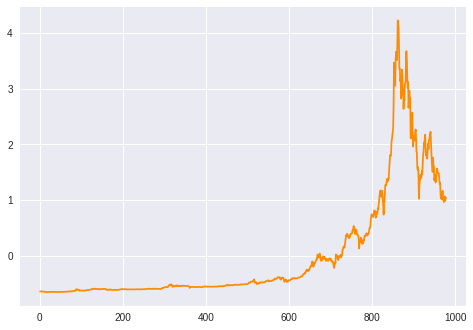

In [9]:
t=range(1,979)
plt.plot(t, np.flipud(Y), color='darkorange', label='data')

In [0]:
X_train = X[:930]
X_test = X[930:]
Y_train = Y[:930]
Y_test = Y[930:]

In [11]:
!pip install EMD-signal==0.2.4
from PyEMD import EMD

    100% |████████████████████████████████| 51kB 2.6MB/s 
    100% |████████████████████████████████| 1.9MB 8.5MB/s 
    100% |████████████████████████████████| 71kB 12.1MB/s 
    100% |████████████████████████████████| 552kB 12.3MB/s 
    100% |████████████████████████████████| 6.8MB 3.7MB/s 
  Running setup.py bdist_wheel for EMD-signal ... - done
  Stored in directory: /content/.cache/pip/wheels/9d/f0/b9/79f020d9b095f845259aec6077543cd4e1f0c30c6cfb449a8e
  Running setup.py bdist_wheel for numpydoc ... - done
  Stored in directory: /content/.cache/pip/wheels/ea/55/7f/3e25d754760ccd62d6796e5b2cfe25629346f52ea00753d549
Successfully built EMD-signal numpydoc


In [12]:
from sklearn.svm import SVR
emd = EMD()
IMFs = emd(Y_train)
clf1 = SVR()
clf1.fit(X_train, IMFs[0])
clf2 = SVR()
clf2.fit(X_train, IMFs[1])
clf3 = SVR()
clf3.fit(X_train, IMFs[2])
clf4 = SVR()
clf4.fit(X_train, IMFs[3])
clf5 = SVR()
clf5.fit(X_train, IMFs[4])
clf6 = SVR()
clf6.fit(X_train, IMFs[5])
clf7 = SVR()
clf7.fit(X_train, IMFs[6])
clf8 = SVR()
clf8.fit(X_train, IMFs[7])
clf9 = SVR()
clf9.fit(X_train, IMFs[8])
clf = SVR()
clf.fit(np.transpose(IMFs), Y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
predict_imf = [clf1.predict(X_test),clf2.predict(X_test), clf3.predict(X_test),clf4.predict(X_test),clf5.predict(X_test),clf6.predict(X_test), 
               clf7.predict(X_test),clf8.predict(X_test), clf9.predict(X_test)]
predict_imf2 = [clf1.predict(X_train),clf2.predict(X_train), clf3.predict(X_train),clf4.predict(X_train),clf5.predict(X_train),clf6.predict(X_train), 
               clf7.predict(X_train),clf8.predict(X_train), clf9.predict(X_train)]
predict = clf.predict(np.transpose(predict_imf2))
predict2 = clf.predict(np.transpose(predict_imf))

In [14]:
from sklearn.metrics import mean_squared_error
#test_loss
mean_squared_error(Y_test, predict2)

0.02989539109053399

In [15]:
#training_loss
mean_squared_error(Y_train, predict)

0.01840040488841103

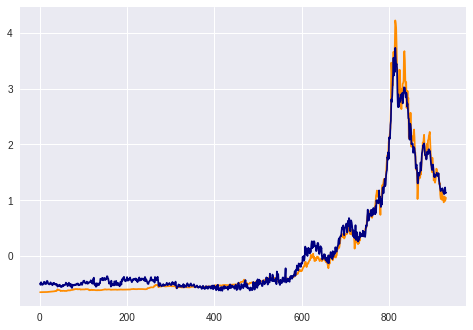

In [16]:
t = range(1,931)
plt.plot(t, np.flipud(Y_train), color='darkorange', label='data')
plt.plot(t, np.flipud(predict), color='navy', label='RBF model')

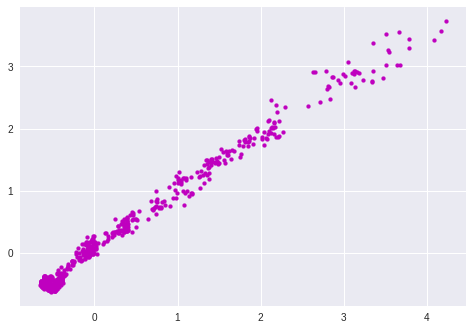

In [17]:
#Regression_curve
plt.scatter(Y_train, predict, color='m', label='data', s=15)